Zadanie 1

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

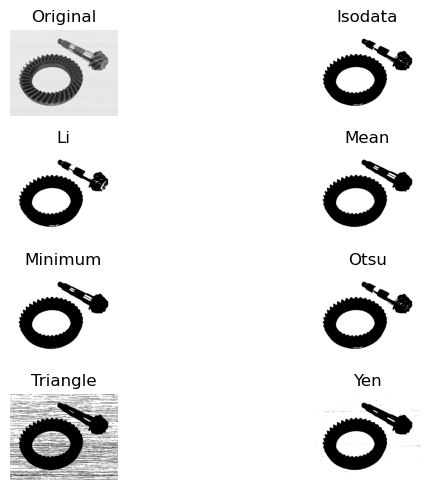

In [18]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import try_all_threshold, threshold_minimum, threshold_mean

gears = skimage.io.imread('gears1.png', as_gray=True)
try_all_threshold(gears)

0.7270909926470588   0.734854291894694


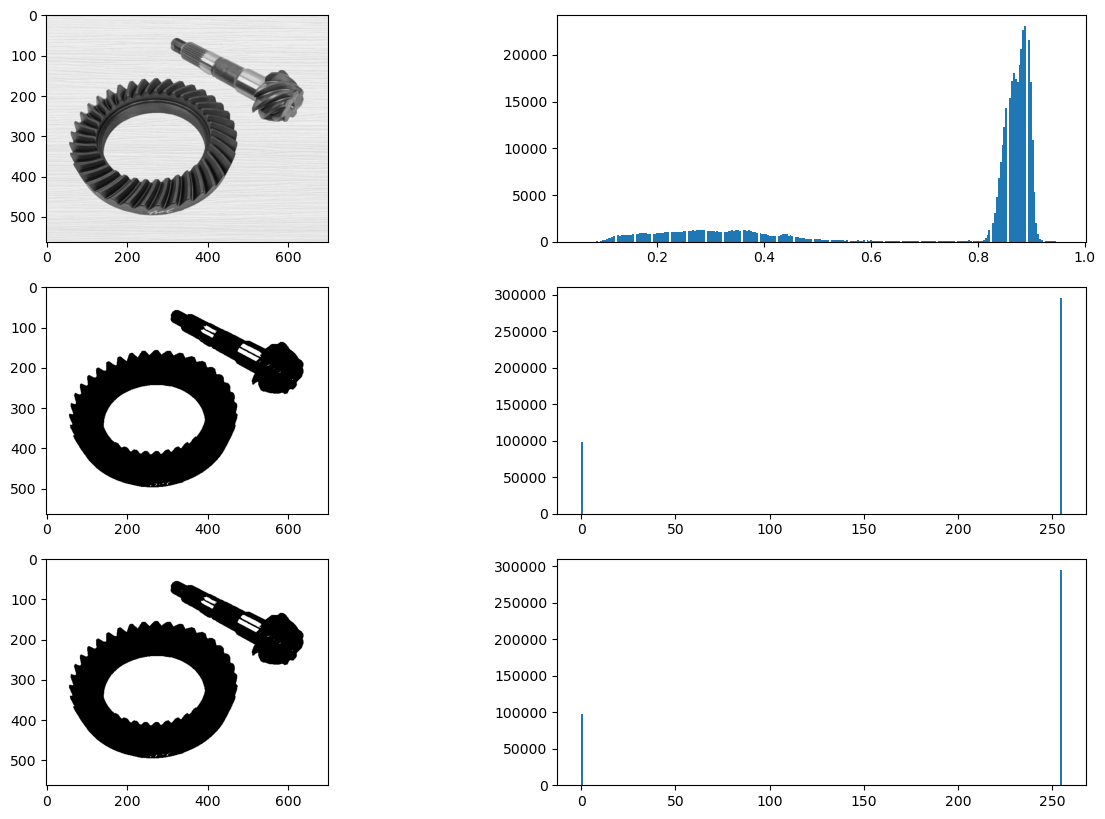

In [31]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import try_all_threshold, threshold_minimum, threshold_mean

threshold_min = threshold_minimum(gears)
threshold_mean = threshold_mean(gears)

print(threshold_min, " ", threshold_mean)

def threshold_image(image, threshold):
    new_image = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i, j] = (image[i, j] > threshold) * 255
    return new_image
plt.subplots(3,2,figsize=(15,10))
plt.subplot(3,2,1)
plt.imshow(gears,cmap='gray')
plt.subplot(3,2,2)
plt.hist(gears.ravel(), bins=256)
plt.subplot(3, 2, 3)
gears_min = threshold_image(gears, threshold_min)
plt.imshow(gears_min,cmap='gray')
plt.subplot(3, 2, 4)
plt.hist(gears_min.ravel(), bins=256)
plt.subplot(3, 2, 5)
gears_mean = threshold_image(gears, threshold_mean)
plt.imshow(gears_mean,cmap='gray')
plt.subplot(3, 2, 6)
plt.hist(gears_mean.ravel(), bins=256)
plt.show()

Zadanie 2

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


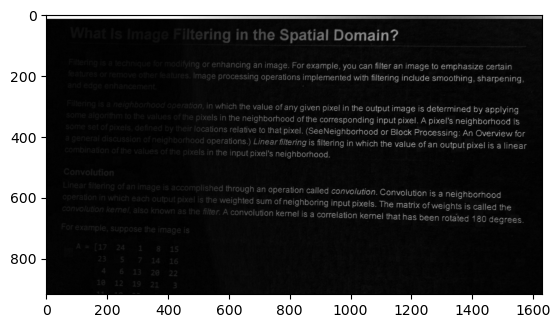

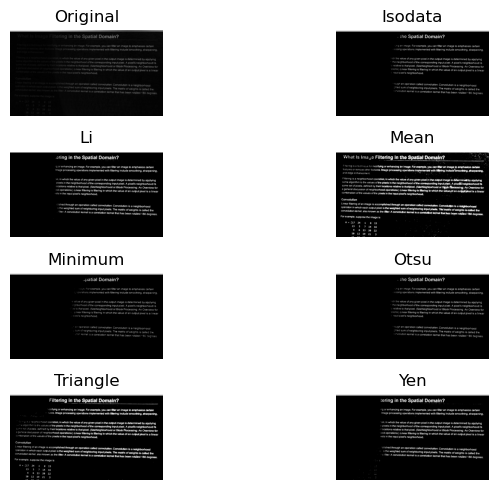

In [48]:
from skimage import data, color
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import try_all_threshold, threshold_minimum, threshold_mean, rank

text_img = skimage.io.imread('printed_text.png')
text_img = (color.rgb2gray(text_img)*255).astype(np.uint8)
background_img = rank.maximum(text_img, np.ones((30,30)))
img = background_img-text_img
plt.imshow( img, cmap='gray')
try_all_threshold(img)
best_image = threshold_image(img, threshold_mean(img))
plt.imsave('best_text.jpg', best_image, cmap='gray')

Zadanie 3

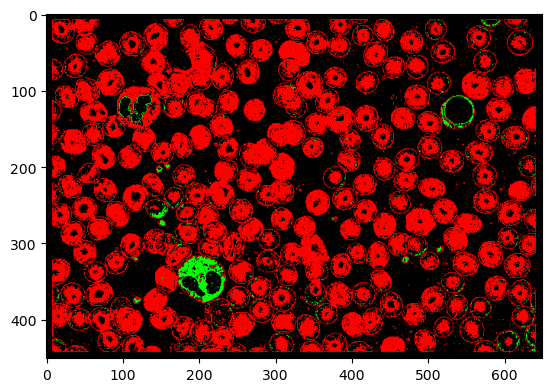

In [57]:
from skimage import data, color
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import try_all_threshold, threshold_minimum, threshold_mean, rank

blood = skimage.io.imread('blood_smear (1).jpg')
blood = (color.rgb2gray(blood)*255).astype(np.uint8)

t1, t_1 = 190, 80
t2, t_2 = 240, 160

pimg1 = (blood > t1) * (blood <= t2)
pimg2 = (blood > t_1) * (blood <= t_2)
pimg3 = np.zeros_like(pimg1)

dimg = np.dstack([pimg1, pimg2, pimg3])
plt.imshow(dimg*255)
